# **PERSON IDENTIFICATION USING VOICE DATA VIA LSTM NETWORKS**
Author: Md Rahad Khan

Last Edit Date: 06 June 2022



### All libraries to run the code with dependencies and mount with colab

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import librosa
import IPython.display as ipd
import librosa.display
import math
import json
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### To extract Feature We used MFCC. save_mfcc() is a function that is used to extract mfcc.

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset"
JSON_PATH = "/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/data.json"
SAMPLE_RATE = 44100
TRACK_DURATION = 30 #in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length = 512, num_segments = 10):
  #create dictionary to mapping, labels, and mfccs

  data = {
      "mapping": [],
      "labels": [],
      "mfcc": []
  }


  samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

  #load the directory and access all folders and files
  i = 0
  for dirpath, dirnames, filenames in os.walk(dataset_path):
    for (f) in filenames:
      semantic_labels = f.split(".")[0]
      print(semantic_labels)
      data["mapping"].append(semantic_labels)

      file_path = os.path.join(dirpath,f)
      signal, sample_rate = librosa.load(file_path, sr = SAMPLE_RATE)
      signal, index = librosa.effects.trim(signal)
      i = i + 1
      # process all segments of audio file
      for d in range(num_segments):
        # calculate start and finish sample for current segment
        start = samples_per_segment * d
        finish = start + samples_per_segment
        # extract mfcc
        mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc = mfcc.T
        # store only mfcc feature with expected number of vectors
        if len(mfcc) == num_mfcc_vectors_per_segment:
          data["mfcc"].append(mfcc.tolist())
          data["labels"].append(i-1)
          print("{}, segment of test data:{}".format(file_path, d+1))

  with open(json_path, "w") as fp:
    json.dump(data, fp, indent=4)

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, n_mfcc=20, num_segments=20)

176014


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/176014.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/176014.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/176014.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/176014.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/176014.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/176014.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/176014.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/176014.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/176014.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164102.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164102.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164102.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164102.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164102.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164102.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164102.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164102.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164102.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193118.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193118.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193118.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193118.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193118.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193118.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193118.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193118.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193118.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172038.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172038.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172038.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172038.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172038.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172038.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172038.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172038.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172038.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192036.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192036.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192036.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192036.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192036.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192036.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192036.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192036.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192036.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177030.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177030.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177030.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177030.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177030.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177030.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177030.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177030.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177030.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171039.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171039.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171039.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171039.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171039.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171039.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171039.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171039.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171039.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191020.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191020.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191020.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191020.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191020.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191020.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191020.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191020.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191020.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173066.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173066.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173066.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173066.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173066.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173066.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173066.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173066.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173066.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171042.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171042.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171042.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171042.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171042.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171042.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171042.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171042.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171042.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194091.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194091.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194091.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194091.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194091.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194091.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194091.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194091.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194091.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194054.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194054.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194054.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194054.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194054.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194054.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194054.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194054.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194054.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193039.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193039.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193039.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193039.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193039.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193039.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193039.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193039.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193039.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202080.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202080.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202080.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202080.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202080.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202080.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202080.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202080.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202080.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199015.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199015.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199015.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199015.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199015.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199015.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199015.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199015.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199015.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203006.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203006.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203006.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203006.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203006.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203006.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203006.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203006.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203006.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201052.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201052.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201052.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201052.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201052.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201052.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201052.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201052.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201052.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197001.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197001.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197001.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197001.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197001.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197001.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197001.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197001.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197001.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198012.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198012.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198012.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198012.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198012.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198012.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198012.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198012.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198012.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203076.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203076.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203076.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203076.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203076.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203076.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203076.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203076.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203076.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171087.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171087.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171087.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171087.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171087.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171087.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171087.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171087.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171087.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197031.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197031.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197031.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197031.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197031.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197031.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197031.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197031.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197031.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204005.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204005.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204005.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204005.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204005.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204005.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204005.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204005.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204005.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202067.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202067.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202067.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202067.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202067.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202067.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202067.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202067.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/202067.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193116.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193116.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193116.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193116.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193116.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193116.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193116.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193116.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193116.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198025.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198025.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198025.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198025.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198025.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198025.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198025.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198025.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198025.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172008.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172008.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172008.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172008.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172008.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172008.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172008.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172008.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172008.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171020.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171020.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171020.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171020.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171020.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171020.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171020.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171020.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171020.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201107.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201107.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201107.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201107.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201107.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201107.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201107.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201107.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201107.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193002.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193002.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193002.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193002.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193002.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193002.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193002.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193002.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193002.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193120.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193120.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193120.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193120.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193120.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193120.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193120.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193120.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193120.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174055.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174055.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174055.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174055.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174055.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174055.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174055.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174055.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174055.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171049.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171049.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171049.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171049.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171049.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171049.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171049.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171049.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171049.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163044.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163044.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163044.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163044.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163044.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163044.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163044.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163044.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163044.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177022.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177022.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177022.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177022.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177022.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177022.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177022.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177022.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177022.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172023.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172023.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172023.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172023.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172023.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172023.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172023.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172023.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172023.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194117.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194117.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194117.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194117.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194117.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194117.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194117.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194117.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194117.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193099.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193099.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193099.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193099.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193099.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193099.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193099.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193099.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193099.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172059.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172059.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172059.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172059.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172059.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172059.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172059.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172059.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172059.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193033.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193033.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193033.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193033.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193033.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193033.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193033.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193033.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193033.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172041.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172041.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172041.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172041.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172041.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172041.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172041.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172041.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172041.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193012.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193012.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193012.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193012.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193012.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193012.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193012.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193012.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193012.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195006.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195006.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195006.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195006.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195006.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195006.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195006.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195006.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195006.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171123.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171123.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171123.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171123.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171123.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171123.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171123.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171123.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171123.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201077.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201077.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201077.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201077.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201077.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201077.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201077.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201077.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201077.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192029.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192029.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192029.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192029.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192029.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192029.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192029.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192029.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192029.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193096.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193096.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193096.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193096.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193096.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193096.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193096.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193096.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193096.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198015.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198015.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198015.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198015.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198015.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198015.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198015.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198015.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198015.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171027.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171027.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171027.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171027.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171027.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171027.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171027.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171027.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171027.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193114.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193114.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193114.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193114.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193114.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193114.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193114.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193114.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193114.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172077.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172077.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172077.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172077.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172077.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172077.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172077.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172077.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172077.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173100.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173100.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173100.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173100.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173100.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173100.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173100.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173100.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173100.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173012.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173012.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173012.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173012.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173012.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173012.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173012.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173012.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173012.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172061.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172061.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172061.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172061.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172061.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172061.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172061.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172061.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172061.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207029.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207029.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207029.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207029.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207029.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207029.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207029.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207029.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207029.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191040.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191040.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191040.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191040.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191040.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191040.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191040.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191040.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191040.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192083.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192083.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192083.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192083.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192083.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192083.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192083.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192083.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192083.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171099.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171099.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171099.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171099.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171099.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171099.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171099.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171099.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171099.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192050.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192050.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192050.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192050.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192050.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192050.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192050.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192050.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192050.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173069.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173069.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173069.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173069.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173069.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173069.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173069.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173069.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173069.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198010.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198010.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198010.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198010.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198010.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198010.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198010.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198010.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/198010.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194056.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194056.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194056.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194056.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194056.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194056.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194056.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194056.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194056.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191023.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191023.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191023.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191023.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191023.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191023.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191023.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191023.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191023.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201008.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201008.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201008.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201008.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201008.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201008.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201008.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201008.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/201008.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163084.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163084.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163084.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163084.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163084.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163084.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163084.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163084.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163084.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173026.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173026.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173026.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173026.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173026.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173026.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173026.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173026.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173026.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195033.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195033.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195033.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195033.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195033.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195033.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195033.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195033.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195033.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/175032.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/175032.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/175032.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/175032.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/175032.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/175032.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/175032.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/175032.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/175032.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178028.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178028.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178028.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178028.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178028.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178028.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178028.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178028.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178028.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194119.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194119.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194119.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194119.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194119.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194119.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194119.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194119.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194119.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177017.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177017.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177017.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177017.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177017.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177017.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177017.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177017.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177017.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173059.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173059.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173059.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173059.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173059.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173059.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173059.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173059.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173059.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204069.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204069.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204069.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204069.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204069.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204069.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204069.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204069.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204069.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193069.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193069.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193069.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193069.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193069.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193069.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193069.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193069.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193069.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172003.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172003.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172003.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172003.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172003.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172003.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172003.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172003.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172003.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195004.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195004.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195004.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195004.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195004.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195004.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195004.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195004.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/195004.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177028.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177028.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177028.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177028.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177028.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177028.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177028.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177028.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177028.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178005.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178005.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178005.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178005.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178005.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178005.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178005.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178005.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178005.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207022.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207022.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207022.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207022.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207022.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207022.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207022.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207022.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/207022.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171055.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171055.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171055.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171055.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171055.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171055.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171055.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171055.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171055.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173010.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173010.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173010.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173010.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173010.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173010.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173010.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173010.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173010.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191110.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191110.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191110.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191110.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191110.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191110.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191110.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191110.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191110.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178017.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178017.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178017.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178017.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178017.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178017.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178017.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178017.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178017.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192012.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192012.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192012.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192012.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192012.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192012.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192012.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192012.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192012.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173095.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173095.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173095.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173095.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173095.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173095.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173095.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173095.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173095.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191114.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191114.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191114.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191114.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191114.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191114.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191114.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191114.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191114.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173055.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173055.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173055.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173055.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173055.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173055.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173055.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173055.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173055.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194048.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194048.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194048.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194048.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194048.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194048.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194048.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194048.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194048.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177004.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177004.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177004.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177004.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177004.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177004.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177004.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177004.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177004.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163097.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163097.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163097.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163097.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163097.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163097.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163097.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163097.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163097.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177014.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177014.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177014.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177014.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177014.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177014.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177014.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177014.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177014.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172013.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172013.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172013.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172013.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172013.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172013.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172013.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172013.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172013.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177013.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177013.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177013.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177013.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177013.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177013.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177013.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177013.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177013.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173074.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173074.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173074.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173074.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173074.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173074.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173074.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173074.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173074.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163069.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163069.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163069.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163069.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163069.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163069.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163069.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163069.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163069.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173029.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173029.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173029.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173029.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173029.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173029.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173029.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173029.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173029.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173015.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173015.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173015.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173015.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173015.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173015.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173015.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173015.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173015.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172022.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172022.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172022.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172022.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172022.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172022.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172022.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172022.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172022.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191016.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191016.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191016.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191016.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191016.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191016.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191016.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191016.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191016.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163094.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163094.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163094.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163094.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163094.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163094.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163094.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163094.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163094.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173073.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173073.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173073.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173073.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173073.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173073.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173073.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173073.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173073.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193052.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193052.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193052.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193052.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193052.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193052.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193052.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193052.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193052.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194025.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194025.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194025.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194025.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194025.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194025.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194025.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194025.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194025.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197005.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197005.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197005.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197005.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197005.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197005.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197005.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197005.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/197005.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204022.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204022.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204022.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204022.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204022.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204022.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204022.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204022.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204022.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174082.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174082.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174082.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174082.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174082.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174082.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174082.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174082.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174082.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177019.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177019.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177019.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177019.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177019.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177019.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177019.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177019.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/177019.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173063.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173063.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173063.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173063.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173063.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173063.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173063.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173063.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173063.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173003.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173003.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173003.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173003.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173003.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173003.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173003.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173003.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173003.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194026.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194026.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194026.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194026.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194026.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194026.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194026.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194026.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194026.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162054.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162054.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162054.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162054.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162054.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162054.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162054.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162054.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162054.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191015.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191015.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191015.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191015.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191015.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191015.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191015.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191015.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/191015.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171056.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171056.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171056.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171056.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171056.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171056.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171056.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171056.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/171056.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173038.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173038.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173038.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173038.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173038.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173038.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173038.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173038.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173038.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194043.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194043.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194043.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194043.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194043.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194043.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194043.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194043.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194043.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199006.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199006.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199006.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199006.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199006.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199006.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199006.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199006.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/199006.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173064.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173064.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173064.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173064.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173064.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173064.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173064.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173064.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173064.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164055.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164055.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164055.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164055.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164055.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164055.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164055.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164055.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164055.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173054.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173054.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173054.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173054.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173054.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173054.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173054.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173054.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173054.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204120.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204120.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204120.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204120.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204120.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204120.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204120.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204120.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204120.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173077.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173077.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173077.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173077.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173077.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173077.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173077.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173077.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173077.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172025.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172025.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172025.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172025.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172025.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172025.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172025.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172025.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172025.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172106.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172106.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172106.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172106.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172106.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172106.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172106.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172106.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172106.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178010.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178010.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178010.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178010.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178010.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178010.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178010.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178010.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178010.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174107.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174107.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174107.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174107.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174107.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174107.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174107.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174107.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174107.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194014.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194014.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194014.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194014.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194014.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194014.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194014.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194014.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194014.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178014.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178014.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178014.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178014.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178014.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178014.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178014.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178014.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/178014.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172014.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172014.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172014.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172014.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172014.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172014.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172014.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172014.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172014.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194011.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194011.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194011.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194011.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194011.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194011.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194011.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194011.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194011.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162064.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162064.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162064.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162064.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162064.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162064.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162064.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162064.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162064.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192011.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192011.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192011.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192011.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192011.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192011.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192011.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192011.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192011.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172029.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172029.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172029.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172029.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172029.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172029.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172029.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172029.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172029.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162065.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162065.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162065.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162065.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162065.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162065.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162065.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162065.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162065.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163031.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163031.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163031.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163031.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163031.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163031.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163031.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163031.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163031.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162108.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162108.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162108.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162108.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162108.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162108.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162108.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162108.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162108.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163047.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163047.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163047.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163047.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163047.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163047.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163047.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163047.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/163047.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204110.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204110.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204110.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204110.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204110.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204110.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204110.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204110.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204110.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194061.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194061.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194061.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194061.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194061.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194061.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194061.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194061.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194061.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173099.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173099.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173099.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173099.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173099.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173099.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173099.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173099.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/173099.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174038.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174038.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174038.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174038.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174038.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174038.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174038.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174038.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174038.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193086.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193086.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193086.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193086.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193086.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193086.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193086.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193086.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193086.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/209012.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/209012.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/209012.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/209012.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/209012.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/209012.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/209012.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/209012.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/209012.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164025.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164025.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164025.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164025.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164025.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164025.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164025.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164025.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164025.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162105.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162105.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162105.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162105.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162105.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162105.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162105.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162105.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/162105.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164101.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164101.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164101.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164101.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164101.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164101.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164101.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164101.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164101.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174045.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174045.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174045.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174045.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174045.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174045.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174045.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174045.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174045.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164086.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164086.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164086.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164086.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164086.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164086.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164086.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164086.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164086.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164109.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164109.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164109.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164109.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164109.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164109.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164109.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164109.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164109.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194052.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194052.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194052.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194052.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194052.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194052.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194052.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194052.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/194052.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164120.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164120.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164120.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164120.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164120.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164120.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164120.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164120.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164120.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164078.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164078.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164078.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164078.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164078.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164078.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164078.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164078.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164078.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164073.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164073.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164073.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164073.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164073.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164073.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164073.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164073.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164073.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164119.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164119.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164119.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164119.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164119.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164119.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164119.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164119.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164119.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204112.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204112.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204112.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204112.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204112.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204112.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204112.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204112.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204112.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164080.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164080.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164080.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164080.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164080.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164080.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164080.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164080.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164080.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192106.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192106.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192106.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192106.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192106.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192106.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192106.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192106.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/192106.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204083.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204083.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204083.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204083.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204083.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204083.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204083.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204083.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/204083.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174116.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174116.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174116.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174116.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174116.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174116.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174116.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174116.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174116.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164075.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164075.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164075.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164075.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164075.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164075.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164075.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164075.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164075.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164116.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164116.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164116.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164116.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164116.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164116.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164116.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164116.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164116.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203062.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203062.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203062.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203062.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203062.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203062.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203062.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203062.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/203062.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164089.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164089.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164089.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164089.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164089.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164089.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164089.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164089.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164089.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193009.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193009.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193009.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193009.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193009.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193009.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193009.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193009.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/193009.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164082.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164082.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164082.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164082.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164082.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164082.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164082.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164082.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164082.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164083.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164083.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164083.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164083.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164083.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164083.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164083.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164083.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164083.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164062.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164062.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164062.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164062.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164062.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164062.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164062.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164062.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164062.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164056.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164056.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164056.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164056.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164056.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164056.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164056.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164056.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164056.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172005.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172005.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172005.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172005.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172005.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172005.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172005.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172005.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/172005.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174028.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174028.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174028.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174028.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174028.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174028.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174028.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174028.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/174028.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164001.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164001.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164001.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164001.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164001.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164001.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164001.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164001.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164001.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164071.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164071.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164071.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164071.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164071.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164071.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164071.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164071.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164071.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164013.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164013.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164013.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164013.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164013.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164013.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164013.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164013.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164013.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164039.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164039.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164039.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164039.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164039.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164039.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164039.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164039.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164039.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164057.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164057.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164057.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164057.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164057.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164057.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164057.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164057.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164057.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164012.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164012.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164012.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164012.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164012.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164012.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164012.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164012.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164012.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164072.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164072.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164072.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164072.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164072.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164072.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164072.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164072.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164072.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164053.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164053.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164053.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164053.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164053.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164053.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164053.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164053.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164053.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164060.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164060.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164060.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164060.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164060.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164060.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164060.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164060.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164060.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164018.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164018.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164018.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164018.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164018.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164018.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164018.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164018.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164018.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164009.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164009.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164009.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164009.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164009.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164009.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164009.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164009.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164009.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164020.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164020.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164020.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164020.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164020.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164020.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164020.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164020.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164020.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164032.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164032.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164032.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164032.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164032.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164032.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164032.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164032.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164032.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164031.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164031.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164031.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164031.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164031.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164031.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164031.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164031.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164031.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164081.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164081.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164081.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164081.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164081.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164081.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164081.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164081.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164081.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164110.wav, segment of test data:1
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164110.wav, segment of test data:2
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164110.wav, segment of test data:3
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164110.wav, segment of test data:4
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164110.wav, segment of test data:5
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164110.wav, segment of test data:6
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164110.wav, segment of test data:7
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164110.wav, segment of test data:8
/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/dataset/164110.wav, segment of test data:9
/content/drive/MyDrive/Colab Notebook

### To load extracted feature MFCC prepare_dataset() and load_data() used.

In [ ]:
JSON_PATH = "/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/data.json"

In [ ]:
def load_data(data_path):
  with open(data_path,"r") as fp:
    data = json.load(fp)

  X = np.array(data["mfcc"])
  y = np.array(data["labels"])
  target = np.array(data["mapping"])



  return target,X,y

In [ ]:
def prepare_dataset(test_size):
  target,X, y = load_data(JSON_PATH)
  X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,test_size=test_size)
  #X_Train, X_Valid, y_Train, y_Valid = train_test_split(X_Train, y_Train, test_size = validation_size)

  person = len(np.unique(target))


  return person, X_Train, X_Test, y_Train, y_Test

### To plot train test accuracy and loss function during training period plot_history() is used.

In [ ]:
def plot_history(history):
  fig, axs = plt.subplots(2)

  # create accuracy sublpot
  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"],"--", label="test accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy")
  plt.savefig("acc.jpg")
  # create error sublpot
  axs[1].plot(history.history["loss"], label="train error")
  axs[1].plot(history.history["val_loss"],"--",label="test error")
  axs[1].set_ylabel("Error")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Error")
  plt.savefig("loss.jpg")
  #plt.show()

### Our proposed two layered LSTM model with 1024 unit cell.

In [ ]:
def build_model(input_shape,target):
  # build network topology
  model = keras.Sequential()

  # 2 LSTM layers
  model.add(keras.layers.LSTM(1024,input_shape=input_shape,return_sequences=True))
  model.add(keras.layers.LSTM(1024))


  # dense layer
  model.add(keras.layers.Dense(512, activation='relu'))
  model.add(keras.layers.Dropout(0.5))

  # output layer
  model.add(keras.layers.Dense(target, activation='softmax'))

  return model

### model_train() function act as an main() function.

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger

In [ ]:
from gc import callbacks
def model_train(test_size):
  PERSON, X_Train, X_Test, y_Train, y_Test = prepare_dataset(test_size)
  input_shape = (X_Train.shape[1], X_Train.shape[2])
  model = build_model(input_shape,PERSON)
  optimizer = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])


  filepath = "/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
  checkpoint = ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
  log_csv = CSVLogger('/content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/my_logs.csv',separator=',',append=False)
  early_stop = EarlyStopping(monitor='val_loss',patience=10,verbose=1)
  callbacks_list = [checkpoint,log_csv,early_stop]


  history = model.fit(X_Train, y_Train, validation_data=(X_Test, y_Test), batch_size = 32, epochs = 100, callbacks=callbacks_list)
  test_loss, test_acc = model.evaluate(X_Test, y_Test, verbose=1)
  return test_acc,history,model,X_Test,y_Test

In [ ]:
test_acc,history,model,X_Test,y_Test = model_train(.1)

Epoch 1/100
123/123 [==============================] - ETA: 0s - loss: 5.3314 - accuracy: 0.0127
Epoch 1: val_accuracy improved from -inf to 0.05275, saving model to /content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/weights-improvement-01-0.05.hdf5
123/123 [==============================] - 22s 154ms/step - loss: 5.3314 - accuracy: 0.0127 - val_loss: 5.0488 - val_accuracy: 0.0528
Epoch 2/100
123/123 [==============================] - ETA: 0s - loss: 4.5947 - accuracy: 0.0596
Epoch 2: val_accuracy improved from 0.05275 to 0.11697, saving model to /content/drive/MyDrive/Colab Notebooks/Thesis/voice recognition/weights-improvement-02-0.12.hdf5
123/123 [==============================] - 16s 127ms/step - loss: 4.5947 - accuracy: 0.0596 - val_loss: 3.9429 - val_accuracy: 0.1170
Epoch 3/100
123/123 [==============================] - ETA: 0s - loss: 3.7318 - accuracy: 0.1524
Epoch 3: val_accuracy improved from 0.11697 to 0.26147, saving model to /content/drive/MyDrive/Colab Noteb

### To save model for later use we used save model and plot accuracy and loss curve.

In [ ]:
model.save("/content/drive/MyDrive/Thesis/saved_models/person_identification.h5")


Test accuracy: 0.8509174585342407


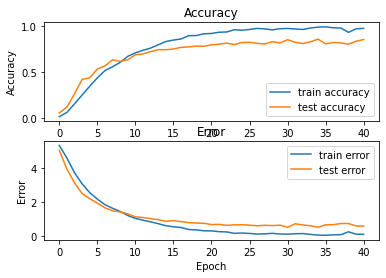

In [ ]:
# plot accuracy/error for training and validation
plot_history(history)
print('\nTest accuracy:', test_acc)

### To perform k fold cross validation and confusion matrix

In [ ]:
target, X, y = load_data(JSON_PATH)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
accuracy = []
skf = StratifiedKFold(n_splits=10)
for train_indx, test_indx in skf.split(X,y):
  X_train, X_test = X[train_indx],X[test_indx]
  y_train, y_test = y[train_indx],y[test_indx]
  history = model.fit(X_train,y_train,validation_data=(X_test,y_test))

  accuracy.append(history.history['val_accuracy'])

123/123 [==============================] - 15s 120ms/step - loss: 0.0530 - accuracy: 0.9865 - val_loss: 0.0341 - val_accuracy: 0.9908


In [ ]:
np.array(accuracy).mean()

0.9869266033172608

### Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import csv
import pandas as pd
import seaborn as sn

In [ ]:
csvpath = "/content/drive/MyDrive/Thesis/train.csv"

In [ ]:
prediction = model.predict(X_Test)
indx = np.argmax(prediction,axis=1)

header = "Actual_Class Predicted_Class"
header = header.split()
file = open(csvpath,"w",newline="")
writer = csv.writer(file)
writer.writerow(header)

for idx in range(0,y_Test.shape[0]):
  to_append = f"{y_Test[idx]} {indx[idx]}"
  writer.writerow(to_append.split())
file.close()

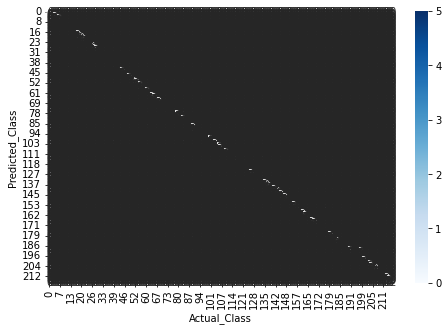

In [ ]:
df = pd.read_csv(csvpath)
confusion_mat = pd.crosstab(df.Predicted_Class,df.Actual_Class)
fig = plt.figure(figsize=(17,5))
ax1 = plt.subplot(121)
sn.heatmap(confusion_mat,annot=True,cmap="Blues")

In [ ]:
total_acc = 0
total_pre = 0
total_re = 0
total_FN = 0
for i in range(confusion_mat.shape[0]):
  TP = confusion_mat.iloc[i,i]
  FP = confusion_mat.iloc[i,:].sum()-TP
  FN = confusion_mat.iloc[:,i].sum()-TP
  TN = confusion_mat.sum().sum()-TP-FP-FN
  print("class: {} TP:{} TN:{} FP:{} FN:{}".format(i,TP,TN,FP,FN))
  Accuracy = (TP+TN)/confusion_mat.sum().sum()
  Precision = TP/(TP+FP)
  Recall = TP/(TP+FN)
  total_acc += Accuracy
  total_pre += Precision
  total_re += Recall
  total_FN += FN


class: 0 TP:4 TN:432 FP:0 FN:0
class: 1 TP:2 TN:434 FP:0 FN:0
class: 2 TP:2 TN:434 FP:0 FN:0
class: 3 TP:3 TN:431 FP:2 FN:0
class: 4 TP:1 TN:435 FP:0 FN:0
class: 5 TP:3 TN:433 FP:0 FN:0
class: 6 TP:1 TN:435 FP:0 FN:0
class: 7 TP:1 TN:435 FP:0 FN:0
class: 8 TP:2 TN:434 FP:0 FN:0
class: 9 TP:2 TN:433 FP:0 FN:1
class: 10 TP:1 TN:435 FP:0 FN:0
class: 11 TP:1 TN:435 FP:0 FN:0
class: 12 TP:2 TN:434 FP:0 FN:0
class: 13 TP:2 TN:434 FP:0 FN:0
class: 14 TP:1 TN:435 FP:0 FN:0
class: 15 TP:1 TN:435 FP:0 FN:0
class: 16 TP:3 TN:433 FP:0 FN:0
class: 17 TP:4 TN:432 FP:0 FN:0
class: 18 TP:4 TN:432 FP:0 FN:0
class: 19 TP:4 TN:432 FP:0 FN:0
class: 20 TP:2 TN:434 FP:0 FN:0
class: 21 TP:1 TN:435 FP:0 FN:0
class: 22 TP:1 TN:434 FP:1 FN:0
class: 23 TP:2 TN:433 FP:0 FN:1
class: 24 TP:4 TN:430 FP:2 FN:0
class: 25 TP:3 TN:433 FP:0 FN:0
class: 26 TP:5 TN:431 FP:0 FN:0
class: 27 TP:1 TN:435 FP:0 FN:0
class: 28 TP:2 TN:434 FP:0 FN:0
class: 29 TP:2 TN:434 FP:0 FN:0
class: 30 TP:1 TN:435 FP:0 FN:0
class: 31 TP:2 TN:

In [ ]:
P = total_pre/confusion_mat.shape[0]
A = total_acc/confusion_mat.shape[0]
R = total_re/confusion_mat.shape[0]

In [ ]:
F = (2*P*R)/ (P+R)

In [ ]:
print(A,P,R,F)

0.9898116851762427 0.03859649122807017 0.03614035087719299 0.03732806193888477
